In [1]:
#Import the library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:

#Read the file
xlsx = pd.ExcelFile('Dataset.xlsx')

#read the data from local directory
data = pd.read_excel(xlsx, 'Dataset')
Originaldataset=data

#view data sample
#data.head()

In [3]:
#create the column Timeliness to the original data set 
data['Timeliness']=data['Teacher.Response.Time']-data['Student.Message.Time']

#delete student message time and teacher response time
#del data['Teacher.Response.Time']
#del data['Student.Message.Time']

#View the resultant dataset
#data.head()

In [4]:
# eliminating rows with missing data
data=data.dropna()

#check the shape of new dataset
data.shape #66009-13664

(52345, 7)

In [5]:
dates = pd.DatetimeIndex(data['Student.Message.Time'])
data['DAY']=dates.weekday+1
data['Month']=dates.month


C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [6]:
#convert the TIMELINESS TO SECONDS

data['Timeliness_second']=data['Timeliness'].astype('timedelta64[s]')

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
data.groupby('Month', as_index=False)['Timeliness_second'].mean()

,Month,Timeliness_second
0,1,124298.284906
1,2,110059.711950
2,3,122309.532263
3,4,121289.219897
4,5,102184.654901
5,6,103503.341071
6,7,108074.340541
7,8,93541.186862
8,9,74840.527741
9,10,42712.308875


In [8]:
data.groupby('DAY', as_index=False)['Timeliness_second'].mean()

,DAY,Timeliness_second
0,1,89524.595603
1,2,88724.264251
2,3,91250.936453
3,4,114478.311527
4,5,125970.631517
5,6,123977.425131
6,7,91003.426705


In [9]:
#data_out['Timeliness_second'>1728000]
databad=data[(data['Timeliness_second'] >1728000)]


In [10]:
databad
x=databad.nlargest(20, 'Timeliness')
x[['College.Name','School.Name','Timeliness','DAY','Month']]

,College.Name,School.Name,Timeliness,DAY,Month
5021,C-BUS,Management,175 days 09:59:20,6,3
5020,C-BUS,Management,174 days 22:55:41,6,3
16074,B-DSC,Media & Communication,165 days 09:26:35,3,4
3301,Z-TRN,Training,164 days 06:35:27,1,3
5278,Z-TRN,Training,157 days 04:30:04,1,3
5312,Z-TRN,Training,157 days 03:35:39,1,3
21979,Z-TRN,Training,149 days 02:44:05,3,5
9274,B-DSC,Fashion & Textiles,143 days 19:52:37,6,3
4525,A-SEH,Health & Biomedical Sciences,143 days 14:24:58,4,3
19884,C-BUS,Management,130 days 01:46:19,2,4


In [20]:
#Binning the timeliness
#Change timeliness into categorical variableTimelinessBin
cut_labels_6 = ['<day','>1day']
cut_bins = [0,86400,170577]
data['TimelinessBin'] = pd.cut(data['Timeliness_second'], bins=cut_bins, labels=cut_labels_6)

C:\Users\ADMIN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


<function matplotlib.pyplot.show(*args, **kw)>

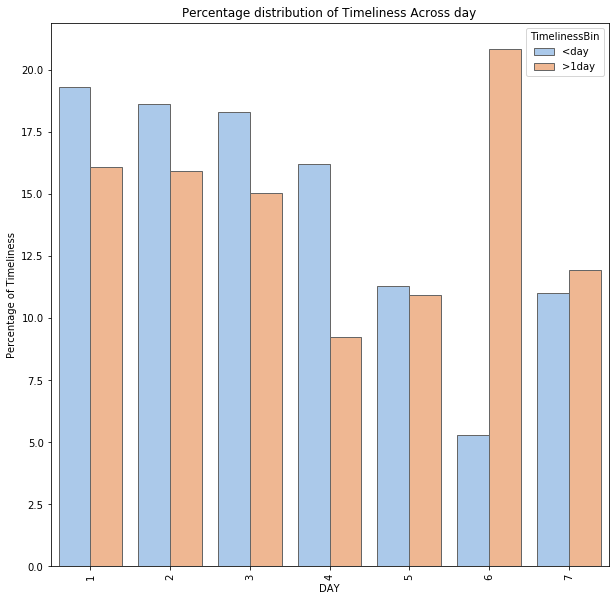

In [21]:
#Display percentage of timeliness across college
plt.figure(figsize=(10, 10))
timeliness_counts = (data.groupby(['TimelinessBin'])['DAY']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('TimelinessBin'))
p = sns.barplot(x="DAY", y="percentage", hue="TimelinessBin", data=timeliness_counts,palette="pastel", edgecolor=".4")
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.title("Percentage distribution of Timeliness Across day")
plt.ylabel("Percentage of Timeliness")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

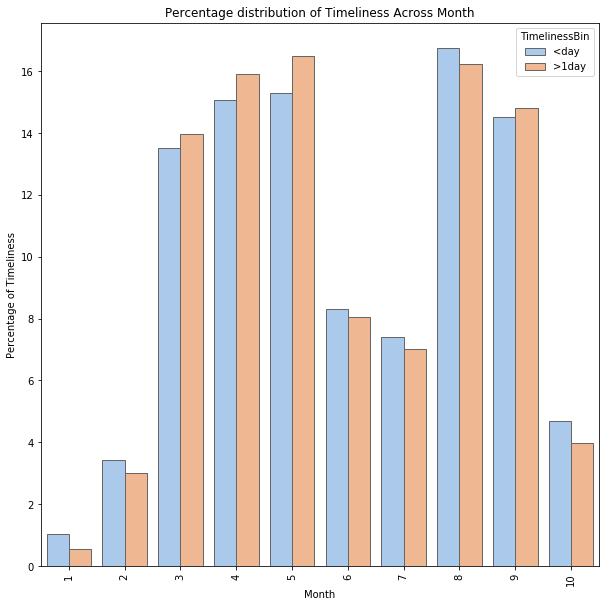

In [22]:
#Display percentage of timeliness across college
plt.figure(figsize=(10, 10))
timeliness_counts = (data.groupby(['TimelinessBin'])['Month']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('TimelinessBin'))
p = sns.barplot(x="Month", y="percentage", hue="TimelinessBin", data=timeliness_counts,palette="pastel", edgecolor=".4")
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels
plt.title("Percentage distribution of Timeliness Across Month")
plt.ylabel("Percentage of Timeliness")
plt.show